<a href="https://colab.research.google.com/github/irymna/Turing-Segundo-Projeto/blob/main/Projeto_2_TA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PROJETO 2 - ANÁLISE, LIMPEZA E PREDIÇÃO DE DADOS

A seguir, meus passos para a resolução do segundo case proposto aos trainees do Turing Academy 2021.

Foi fornecido dois datasets para a realização do projeto: o de ***treino*** e de ***teste***. 

1) Análise do dataset de treino e test

2) Limpeza do dataset de treino e test

3) Análise pós-limpeza dos dois datasets

4) Aplicação de modelos e métricas

5) Predição utilizando os dois datasets

6) Conclusão final.



##TRAIN

###Importar as bibliotecas e o dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
train = pd.read_csv("train.csv")
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


###Visualização dos dados

In [3]:
train.shape # verifica quantas linhas e colunas tem

(19158, 14)

In [4]:
train.columns # verifica quais são as colunas

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [5]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

Em primeira análise, esse dataset apresenta 14 colunas, e entre elas:

• 3 com Dtype numérica (```training_hours```, ```enrollee_id```, ```city_development_index```)

• 10 com Dtype object (```city```, ```gender```, ```relevent_experience```, ```enrolled_university```, ```enrolled_university```, ```education_level```, ```major_discipline```, ```experience```, ```company_size```, ```company_type```, ```last_new_job```)

• 1 ```target```

In [6]:
train.describe().T 

,count,mean,std,min,25%,50%,75%,max
enrollee_id,19158.0,16875.358179,9616.292592,1.000,8554.25,16982.500,25169.75,33380.000
city_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


**A coluna target indica a intenção de mudar, ou não, de emprego.** 

→ 0 = não quer mudar.

→ 1 = quer mudar.

A média do target é aproximadamente 0.25, indicando que a maioria não pretende mudar de emprego.

In [7]:
train.isnull().sum() # verifica valores não preenchidos

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

As colunas ``` gender ```, ```major_discipline```, ```company_size```, ```company_type``` são as que mais tem valores faltantes e as colunas ```enrolled_university```, ```education_level```, ```experience```, ```last_new_job``` também possui dados não preenchidos. Precisarei tratar essas colunas.



###Limpeza dos dados

Nessa sessão, olharei mais de perto as colunas para fazer a limpeza.

####Dados Categóricos

In [8]:
train.describe(include=['object'])

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


Agora, darei um foco nos dados categóricos que apresentam valores faltantes. 

#####Gender

In [9]:
pd.Series(train.gender.unique())


0      Male
1       NaN
2    Female
3     Other
dtype: object

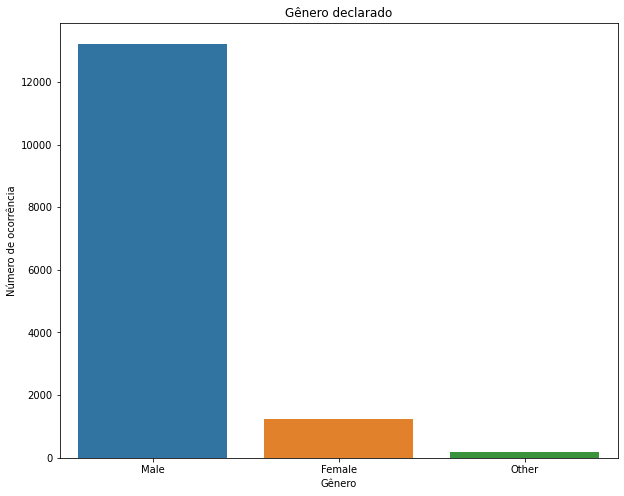

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(x=train['gender'])
sns.set_theme(style='darkgrid')
plt.title('Gênero declarado')
plt.xlabel('Gênero')
plt.ylabel('Número de ocorrência')
plt.show()

In [11]:
train["gender"].value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

In [12]:
train.gender.isna().sum()

4508

In [13]:
train[train.gender.isna()]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0
10,29452,city_21,0.624,NaN,No relevent experience,Full time course,High School,NaN,2,NaN,NaN,never,32,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19140,11398,city_103,0.920,NaN,No relevent experience,no_enrollment,Primary School,NaN,2,NaN,NaN,never,15,0.0
19144,17191,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,4,NaN,NaN,never,48,1.0
19145,155,city_44,0.725,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,Pvt Ltd,never,190,0.0
19148,9212,city_21,0.624,NaN,Has relevent experience,no_enrollment,Masters,STEM,3,100-500,Pvt Ltd,3,40,1.0


Grande maioria das pessoas desse dataset são homens e há poucos valores com o gênero descrito como "outro". Além disso, os valores aqui são grandes, então terei que conferir se o gênero interfere no target antes de fazer qualquer alteração.

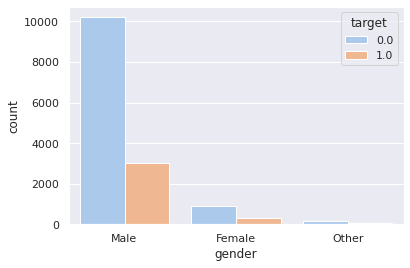

In [14]:
sns.countplot(x='gender', data = train, order = train.gender.value_counts().index, hue='target', palette='pastel') 
plt.show()

Ao que parece, o gênero não influencia na tomada de decisão de ir para um novo emprego ou não. Como os NaN possuem outras informações importantes, não posso apenas apagá-lo, então juntarei com o gênero ```Other```.

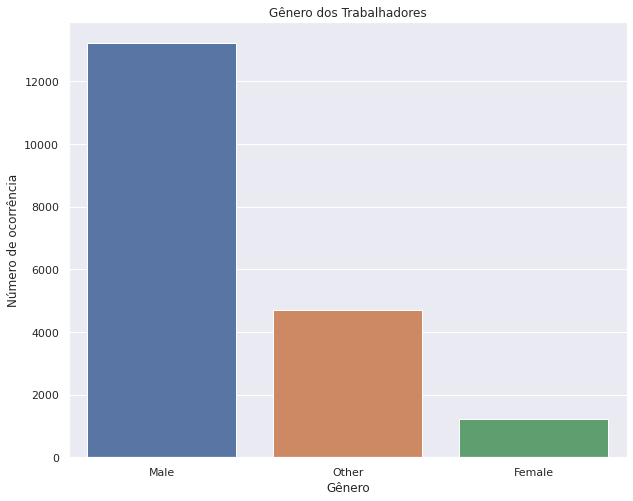

In [15]:
train.fillna({"gender": "Others"}, inplace=True)
train["gender"].replace("Others", "Other", inplace=True)
plt.figure(figsize=(10,8))
sns.countplot(x=train['gender'])
sns.set_theme(style='darkgrid')
plt.title('Gênero dos Trabalhadores')
plt.xlabel('Gênero')
plt.ylabel('Número de ocorrência')
plt.show()


In [16]:
train.info() # Conferir se está tudo certo.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

#####Company type & size

In [17]:
train["company_type"].value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

In [18]:
train.company_type.isna().sum()

6140

Substituirei os 'NaN' por 'Pvt Ltd'.

In [19]:
train.fillna({"company_type": "Pvt Ltd"}, inplace=True)

In [20]:
train["company_type"].value_counts()

Pvt Ltd                15957
Funded Startup          1001
Public Sector            955
Early Stage Startup      603
NGO                      521
Other                    121
Name: company_type, dtype: int64

In [21]:
train.isna().sum() # verificar os dados faltantes

enrollee_id                  0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type                 0
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [22]:
train["company_size"].value_counts()

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

"10/49" pode ser substituído por 10-49, para ficar coerente com o resto, assim como 10000+ ficar 10000>.

In [23]:
train["company_size"].replace("10/49", "10-49", inplace=True)
train["company_size"].replace("10000+", "10000>", inplace=True)
train["company_size"].value_counts()

50-99        3083
100-500      2571
10000>       2019
10-49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [24]:
train.company_size.isna().sum()

5938

Darei uma olhada para ver essa feature interfere na target.

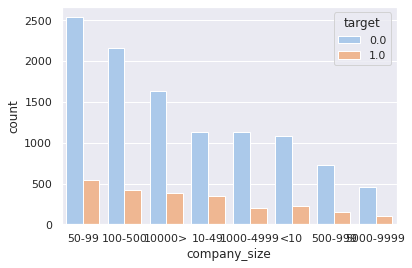

In [25]:
sns.countplot(x='company_size', data = train, order = train.company_size.value_counts().index, hue='target', palette='pastel') 
plt.show()

Bom, parece que não há relação, agora verificarei se os NaN tem algo de diferente do apresentado no gráfico.

In [26]:
train.fillna({"company_size": "Other"}, inplace=True)

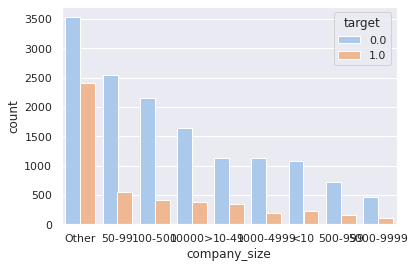

In [27]:
sns.countplot(x='company_size', data = train, order = train.company_size.value_counts().index, hue='target', palette='pastel') 
plt.show()

Parece que há bastante gente querendo mudar de emprego, mesmo sendo minoria. Isso pode interferir nos dados caso deixe essa informação assim, então decidi excluir do dataset.

In [28]:
train.drop(train[train["company_size"] == "Other"].index, inplace=True)

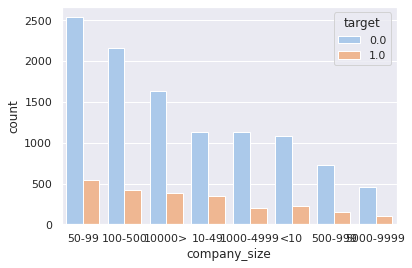

In [29]:
sns.countplot(x='company_size', data = train, order = train.company_size.value_counts().index, hue='target', palette='pastel') 
plt.show()

#####Major Discipline

In [30]:
train["major_discipline"].value_counts()

STEM               10862
Humanities           471
Other                253
Business Degree      217
Arts                 180
No Major             149
Name: major_discipline, dtype: int64

In [31]:
train.major_discipline.isna().sum()

1088

Nesse caso, colocarei os NaN na moda (STEM).

In [32]:
train.fillna({"major_discipline": "STEM"}, inplace=True)

In [33]:
train.isna().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university       149
education_level           154
major_discipline            0
experience                 42
company_size                0
company_type                0
last_new_job              217
training_hours              0
target                      0
dtype: int64

#####Education Level  

In [34]:
train["education_level"].value_counts()

Graduate          8429
Masters           3395
High School        854
Phd                324
Primary School      64
Name: education_level, dtype: int64

In [35]:
train.education_level.isna().sum()

154

Parece que os NaN não interferem no target por ser um número pequeno, com isso, irei excluí-los. 

In [36]:
train.dropna(subset=['education_level'], inplace=True)

In [37]:
train.isna().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university       139
education_level             0
major_discipline            0
experience                 40
company_size                0
company_type                0
last_new_job              208
training_hours              0
target                      0
dtype: int64

#####Enrolled university, experience e last new job 

Aqui, os NaN representam uma pequena parcela dos dados, com isso, irei excluir.

In [38]:
train.dropna(subset=['enrolled_university'], inplace=True)
train.dropna(subset=['experience'], inplace=True)
train.dropna(subset=['last_new_job'], inplace=True)

####Dados numéricos

In [39]:
train.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

Ao que parece, não há mais NaN para serem tratados. De qualquer forma, vou olhar mais de perto as colunas com os dados numéricos.

In [40]:
train["city"].value_counts()

city_103    3035
city_21     1739
city_16     1088
city_114     991
city_160     542
            ... 
city_121       2
city_180       1
city_139       1
city_171       1
city_109       1
Name: city, Length: 119, dtype: int64

In [41]:
train["experience"].value_counts()

>20    2315
5       905
6       829
4       799
10      751
9       716
3       713
7       696
8       581
15      544
2       542
11      502
14      461
16      394
12      387
13      313
17      258
1       244
19      229
18      213
<1      209
20      103
Name: experience, dtype: int64

In [42]:
train["target"].value_counts()

0.0    10489
1.0     2215
Name: target, dtype: int64

In [43]:
train["city_development_index"].value_counts()

0.920    3577
0.624    1739
0.910    1088
0.926     991
0.897     399
         ... 
0.518       2
0.625       2
0.701       1
0.487       1
0.664       1
Name: city_development_index, Length: 92, dtype: int64

In [44]:
train["training_hours"].value_counts()

28     212
22     193
20     188
26     184
12     183
      ... 
310      3
244      3
238      3
270      3
234      3
Name: training_hours, Length: 241, dtype: int64

Não encontrei nada para limpar, então seguirei.

##TEST



###Observações iniciais

In [45]:
test = pd.read_csv("test.csv")
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [46]:
test.shape

(2129, 13)

Tem menos linhas e colunas do que o dataset de treino.

In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


In [48]:
test.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [49]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
enrollee_id,2129.0,16861.614843,9576.846029,3.000,8562.000,16816.000,25129.00,33353.000
city_development_index,2129.0,0.824984,0.125074,0.448,0.698,0.903,0.92,0.949
training_hours,2129.0,64.983091,60.238660,1.000,23.000,47.000,86.00,334.000


Tem uma menor quantidade de dados faltantes do que no dataset de treino porém está alocado nos mesmos lugares. O processo de limpeza será semelhante ao dataset de teste.

###Limpeza dos dados

Basicamente, farei igual ao processo de limpeza anterior. Se acontecer alguma mudança pontuarei.

####Gender

In [50]:
pd.Series(test.gender.unique())

0      Male
1    Female
2       NaN
3     Other
dtype: object

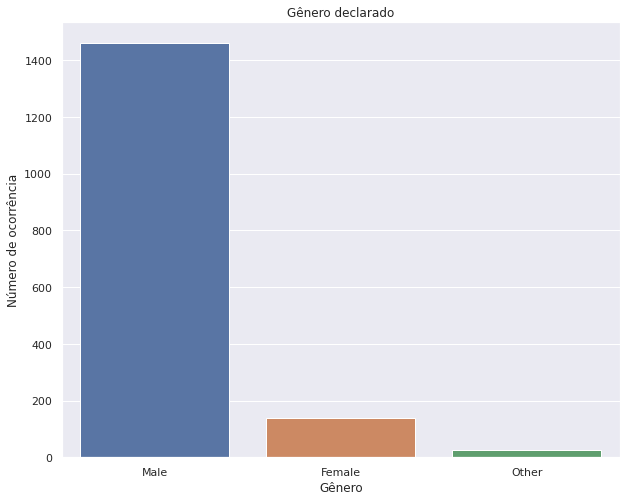

In [51]:
plt.figure(figsize=(10,8))
sns.countplot(x=test['gender'])
sns.set_theme(style='darkgrid')
plt.title('Gênero declarado')
plt.xlabel('Gênero')
plt.ylabel('Número de ocorrência')
plt.show()

In [52]:
train["gender"].value_counts()

Male      9132
Other     2682
Female     890
Name: gender, dtype: int64

In [53]:
test.gender.isna().sum()

508

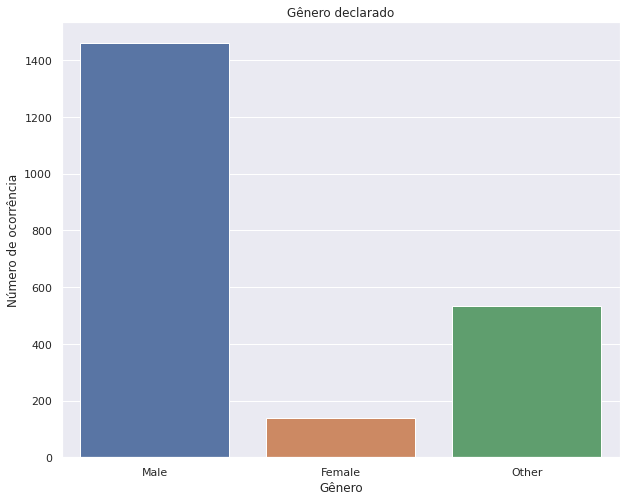

In [54]:
test.fillna({"gender": "Others"}, inplace=True)
test["gender"].replace("Others", "Other", inplace=True)
plt.figure(figsize=(10,8))
sns.countplot(x=test['gender'])
sns.set_theme(style='darkgrid')
plt.title('Gênero declarado')
plt.xlabel('Gênero')
plt.ylabel('Número de ocorrência')
plt.show()

####Company type & size

In [55]:
test["company_type"].value_counts()

Pvt Ltd                1141
Public Sector           127
Funded Startup           97
Early Stage Startup      65
NGO                      53
Other                    12
Name: company_type, dtype: int64

In [56]:
test.company_type.isna().sum()

634

In [57]:
test.fillna({"company_type": "Pvt Ltd"}, inplace=True)

In [58]:
test["company_type"].value_counts()

Pvt Ltd                1775
Public Sector           127
Funded Startup           97
Early Stage Startup      65
NGO                      53
Other                    12
Name: company_type, dtype: int64

In [59]:
test.isna().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type                0
last_new_job               40
training_hours              0
dtype: int64

In [60]:
test["company_size"].value_counts()

50-99        338
100-500      318
10000+       217
10/49        172
<10          163
1000-4999    143
500-999       88
5000-9999     68
Name: company_size, dtype: int64

In [61]:
test["company_size"].replace("10/49", "10-49", inplace=True)
test["company_size"].replace("10000+", "10000>", inplace=True)
test["company_size"].value_counts()

50-99        338
100-500      318
10000>       217
10-49        172
<10          163
1000-4999    143
500-999       88
5000-9999     68
Name: company_size, dtype: int64

In [62]:
test.isna().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type                0
last_new_job               40
training_hours              0
dtype: int64

In [63]:
test["company_size"].unique()

array(['<10', nan, '10-49', '10000>', '100-500', '50-99', '1000-4999',
       '500-999', '5000-9999'], dtype=object)

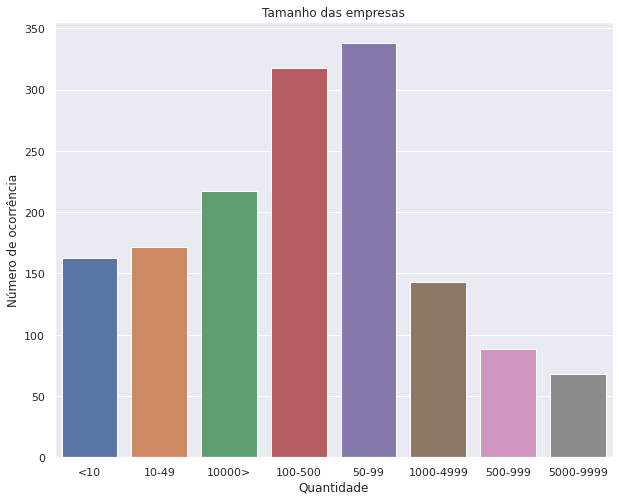

In [64]:
plt.figure(figsize=(10,8))
sns.countplot(x=test['company_size'])
sns.set_theme(style='darkgrid')
plt.title('Tamanho das empresas')
plt.xlabel('Quantidade')
plt.ylabel('Número de ocorrência')
plt.show()

In [65]:
test.company_size.fillna(test.company_size.value_counts().index[0], inplace = True) #Colocarei os NaN na moda

####Major Discipline

In [66]:
test["major_discipline"].value_counts()

STEM               1621
Humanities           80
Other                40
Business Degree      37
No Major             22
Arts                 17
Name: major_discipline, dtype: int64

In [67]:
test.major_discipline.isna().sum()

312

In [68]:
test.fillna({"major_discipline": "STEM"}, inplace=True)

####Education level   

In [69]:
test["education_level"].value_counts()

Graduate          1269
Masters            496
High School        222
Phd                 54
Primary School      36
Name: education_level, dtype: int64

In [70]:
test.education_level.isna().sum()

52

In [71]:
test.dropna(subset=['education_level'], inplace=True)

####Enrolled university, experience e last new job 

In [72]:
test.dropna(subset=['enrolled_university'], inplace=True)
test.dropna(subset=['experience'], inplace=True)
test.dropna(subset=['last_new_job'], inplace=True)

In [73]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2018 non-null   int64  
 1   city                    2018 non-null   object 
 2   city_development_index  2018 non-null   float64
 3   gender                  2018 non-null   object 
 4   relevent_experience     2018 non-null   object 
 5   enrolled_university     2018 non-null   object 
 6   education_level         2018 non-null   object 
 7   major_discipline        2018 non-null   object 
 8   experience              2018 non-null   object 
 9   company_size            2018 non-null   object 
 10  company_type            2018 non-null   object 
 11  last_new_job            2018 non-null   object 
 12  training_hours          2018 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 220.7+ KB


In [74]:
test.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

Bom, acho que é isso que tinha que fazer. Seguimos.

##ANÁLISE

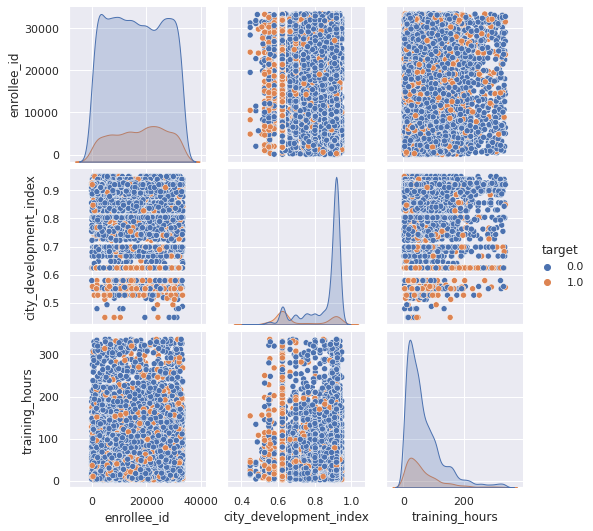

In [75]:
sns.pairplot(train, hue='target') # Relação das colunas com o target

Parece que há mais dados de pessoas que vivem em cidades desenvolvidas. Além disso, grande maioria não pretende mudar de emprego. Vamos ver com mais detalhes.

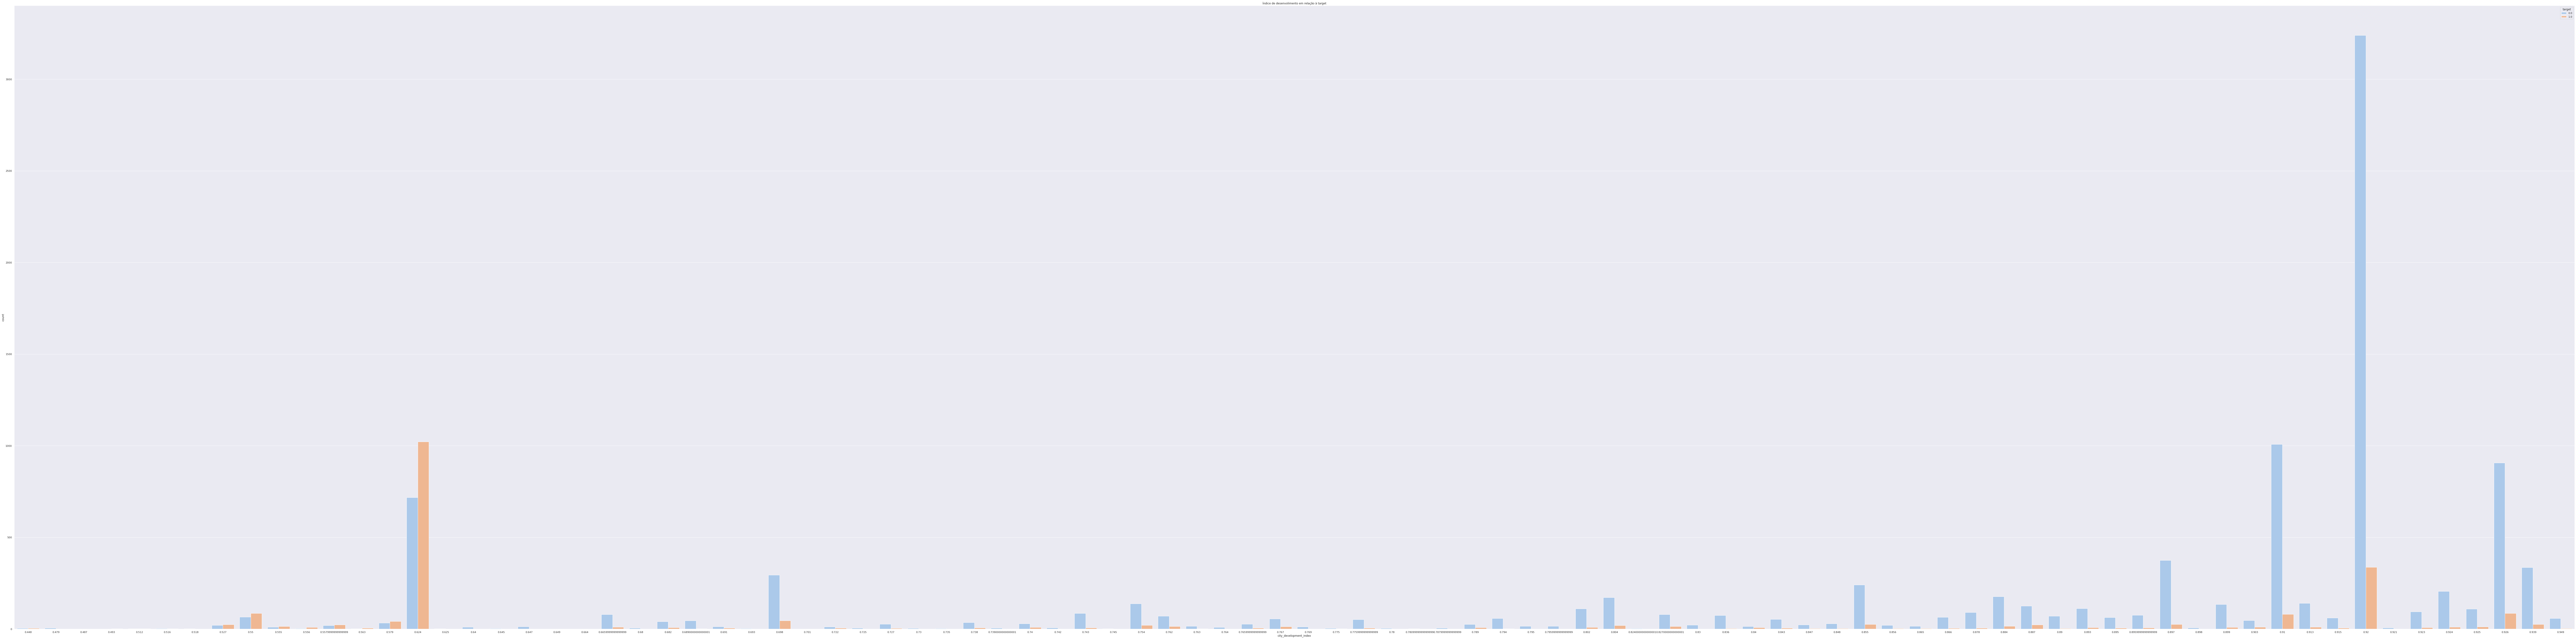

In [76]:
plt.figure(figsize=(200,50))
plt.title("Índice de desenvolimento em relação à target")
sns.countplot(x='city_development_index', hue = 'target' , data = train, palette='pastel') 
plt.show()

Pessoas que vivem em cidades com o índice de desenvolvikento perto dos 0.6 parecem querer mudar de emprego (barra vermelha), uma tendência parecida com outras cidades de índices mais baixos. 

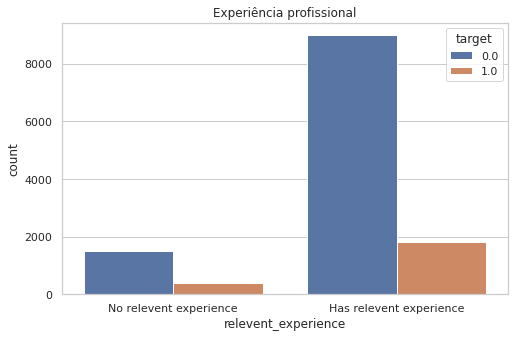

In [77]:
plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
plt.title('Experiência profissional')
plt.ylabel('Quantidade')
sns.countplot(x = 'relevent_experience',hue='target',data=train,palette='deep')

Quanto à experiência profissional, parece não ter relação com o target.

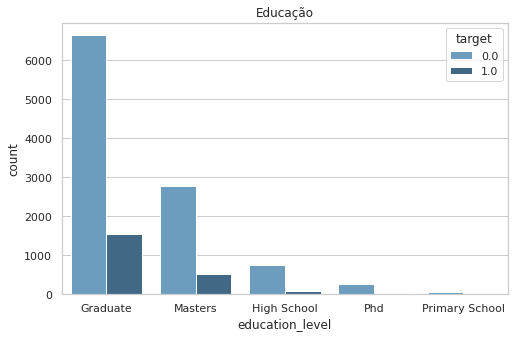

In [78]:
plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
plt.title('Educação')
sns.countplot(x = 'education_level',hue='target',data=train,palette='Blues_d')

Outra feature que parece não ter muita relação com o target.

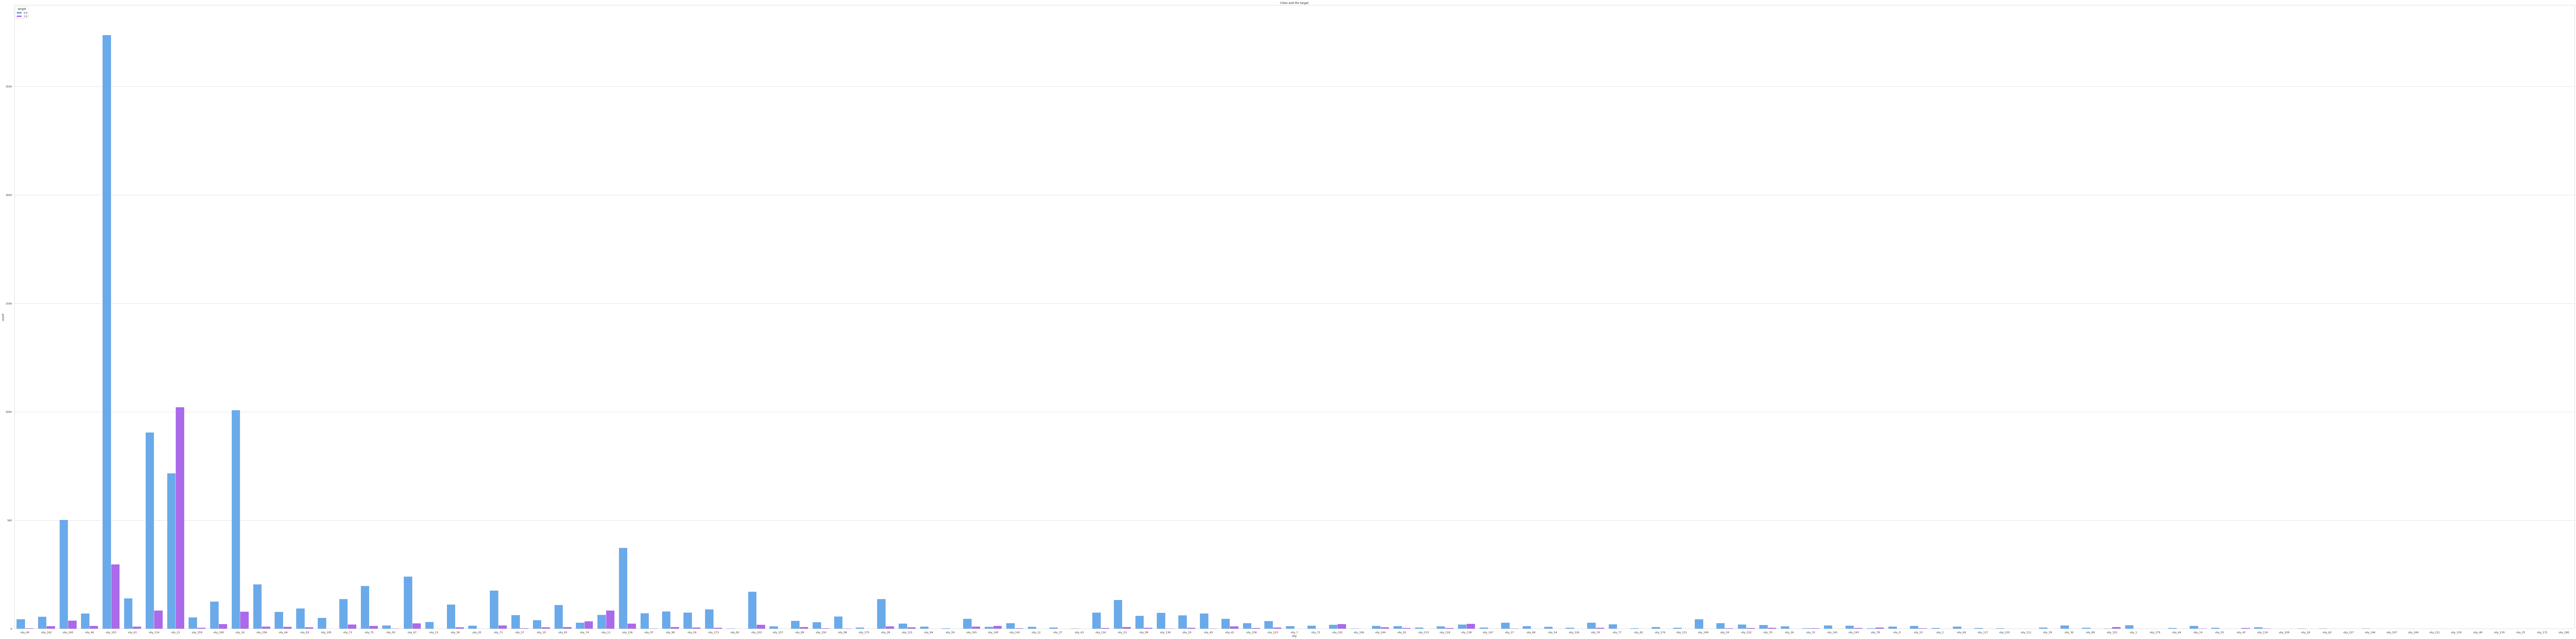

In [79]:
plt.figure(figsize=(200,50))
sns.countplot(x='city', hue = 'target', data=train, palette = "cool")
plt.title("Cities and the target")
plt.show()

Aqui, vemos que a **cidade influencia o target**, já que há locais que a maioria das pessoas querem mudar de emprego, como outras que não. Nesse caso, será preciso olhar mais de perto esses dados, os que mais aparecem.

In [80]:
city_df = train.groupby(['city', 'target']).count().sort_values("enrollee_id", ascending = False)
city_df.reset_index(level=["city"], inplace=True)
city_df.reset_index(level=["target"], inplace=True)
city_df = city_df.rename(columns={'enrollee_id': 'Count'})
city_df

,target,city,Count,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.0,city_103,2737,2737,2737,2737,2737,2737,2737,2737,2737,2737,2737,2737
1,1.0,city_21,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022
2,0.0,city_16,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008
3,0.0,city_114,906,906,906,906,906,906,906,906,906,906,906,906
4,0.0,city_21,717,717,717,717,717,717,717,717,717,717,717,717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,0.0,city_180,1,1,1,1,1,1,1,1,1,1,1,1
210,1.0,city_12,1,1,1,1,1,1,1,1,1,1,1,1
211,1.0,city_133,1,1,1,1,1,1,1,1,1,1,1,1
212,1.0,city_175,1,1,1,1,1,1,1,1,1,1,1,1


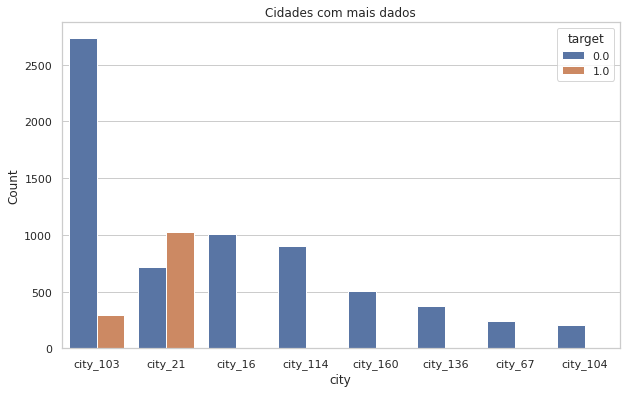

In [81]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'city', y='Count', data=city_df.iloc[0:10], hue = 'target')
plt.title("Cidades com mais dados")
plt.show()

Aqui, dá para ver claramente que a ```city_21``` é a cidade que mais tem pessoas que querem mudar de emprego.

###Conclusões

Durante toda a limpeza, deu para notar alguns aspectos do dataset, além dessa análise em algumas features que me chamaram atenção. 
Uma delas é que cidades com menores índices de desenvolvimento, há um maior índice de pessoas que desejam mudar de emprego. Isso pode ocorrer por questões de qualidade de vida, baixo índice salarial, etc. Além disso, há mais informações de pessoas que vivem em cidades mais desenvolvidas, assim como de pessoas na graduação, o que influencia na predição. Por último, grande maioria das pessoas são homens mas, conforme foi analisado, o gênero não parece influenciar na tomada da decisão de mudar ou não de um emprego. 

##PREDIÇÕES

Com a limpeza e a análise realizada, chegou a hora de realizar a predição. Como a target é de classificação binária (0 = não quer mudar de emprego; 1 = quer mudar de emprego), usarei, primeiro, o modelo de **regressão logística**. Além disso, há dois datasets, um para treino e outro dataset. Verificarei o melhor a ser usado.

###Modelos

Importando as bibliotecas:

In [82]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import classification_report

Algo importante a pontuar é que há muitos features de dados categóricos, portanto, terei que transformá-los em numéricos. 

In [83]:
df_num = pd.get_dummies(train)
df_num

,enrollee_id,city_development_index,training_hours,target,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,city_city_106,city_city_107,city_city_109,city_city_11,city_city_111,city_city_114,city_city_115,city_city_116,city_city_117,city_city_118,city_city_12,city_city_120,city_city_121,city_city_123,city_city_126,city_city_127,city_city_128,city_city_129,city_city_13,city_city_131,city_city_133,city_city_134,city_city_136,city_city_138,city_city_139,city_city_14,city_city_141,city_city_142,...,experience_11,experience_12,experience_13,experience_14,experience_15,experience_16,experience_17,experience_18,experience_19,experience_2,experience_20,experience_3,experience_4,experience_5,experience_6,experience_7,experience_8,experience_9,experience_<1,experience_>20,company_size_10-49,company_size_100-500,company_size_1000-4999,company_size_10000>,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
1,29725,0.776,47,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,666,0.767,8,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
6,28806,0.920,24,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
7,402,0.762,18,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
8,27107,0.920,46,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19149,251,0.920,36,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
19150,32313,0.920,23,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
19152,29754,0.920,25,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
19155,24576,0.920,44,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


Agora, irei separar em duas (treino e teste) partes o dataset de treino.

In [84]:
X = df_num.drop('target', axis = 1)
y = df_num['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y,test_size=0.3) # 30% dos dados para teste.

In [85]:
# treinar o modelo
lgreg = LogisticRegression()
lgreg.fit(X_train, y_train)

LogisticRegression()

In [86]:
# testar o modelo
y_train_predict = lgreg.predict(X_train)
y_test_predict = lgreg.predict(X_test)

print(f'Acurácio no treino: {accuracy_score(y_train, y_train_predict)}')
print(f'Acurácio no teste: {accuracy_score(y_test, y_test_predict)}')

Acurácio no treino: 0.850314889788574
Acurácio no teste: 0.842077649527807


Agora, com o modelo de **Random Forest**

In [87]:
# Treinamento da Random Forest 
rf = RandomForestClassifier(
    max_depth=25,
    n_estimators=200,
    min_samples_split=50,
    criterion='entropy',
    oob_score=True,
    random_state=42
)

rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


RandomForestClassifier(criterion='entropy', max_depth=25, min_samples_split=50,
                       n_estimators=200, oob_score=True, random_state=42)

In [88]:
# Avaliação do modelo
predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.855
Mean accuracy score: 0.839


Com o modelo **KNN (K-Nearest Neighbors)**:

In [89]:
# Determinar o valor de K (distância)
k_range = range(1, 100)
scores = {}
scores_list = []
for k in k_range:
  model_knn = KNeighborsClassifier(n_neighbors = k)
  model_knn.fit(X_train, y_train)
  y_predict = model_knn.predict(X_test)
  scores[k] = accuracy_score(y_test, y_predict)
  scores_list.append(accuracy_score(y_test, y_predict))

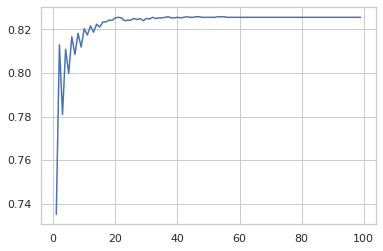

In [90]:
plt.figure
plt.plot(k_range, scores_list)

Para evitar underfitting, usarei o K = 15, que apresenta uma bom valor mas não é a maior. 

In [91]:
knn_model = KNeighborsClassifier(n_neighbors = 15)
knn_model.fit(X_train, y_train)
y_predicted_knn = knn_model.predict(X_test)
print(f'Acurácia: {accuracy_score(y_test, y_predicted_knn)}')

Acurácia: 0.8210912906610703


Com o modelo **Naive Bayes**:

In [108]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_predicted_bayes = nb_model.predict(X_test)
print(f'Acurácia: {accuracy_score(y_test, y_predicted_bayes)}')

Acurácia: 0.7987932843651626


Por fim, com o modelo **SVM (Suport Vector Machine)**:

In [94]:
svm_model = svm.SVC(C = 1.0, probability=True)
svm_model.fit(X_train, y_train)
y_predicted_svm = svm_model.predict(X_test)
print(f'Acurácia: {accuracy_score(y_test, y_predicted_svm)}')

Acurácia: 0.8255508919202519


In [ ]:
print(accuracy_score(y_test, y_predict))

0.8255508919202519


Agora precisa escolher o melhor modelo a ser usado.

###Métricas

**Matriz de Confusão:**
 Essa matriz indica quantos exemplos existem em cada grupo: falso positivo (FP), falso negativo (FN), verdadeiro positivo (TP) e verdadeiro negativo (TN)

In [95]:
y_test.value_counts()

0.0    3147
1.0     665
Name: target, dtype: int64

In [96]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


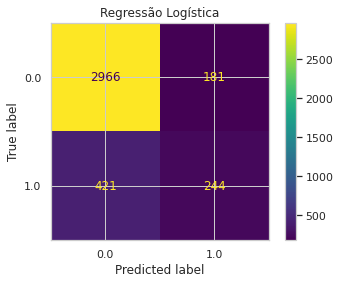

In [97]:
plot_confusion_matrix(lgreg, X_test, y_test, values_format='d')
plt.title('Regressão Logística')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


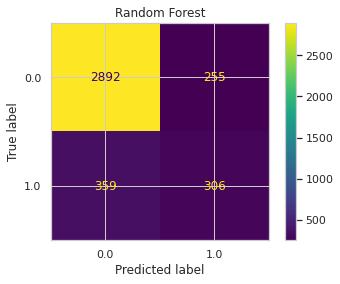

In [98]:
plot_confusion_matrix(rf, X_test, y_test, values_format='d')
plt.title('Random Forest')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


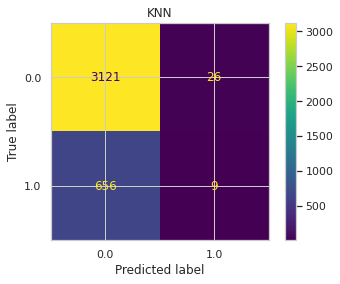

In [99]:
plot_confusion_matrix(knn_model, X_test, y_test, values_format='d')
plt.title('KNN')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


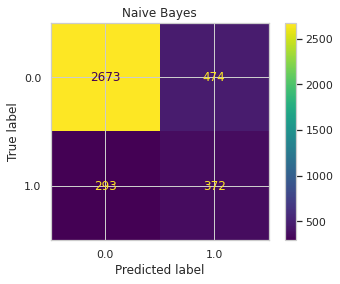

In [109]:
plot_confusion_matrix(nb_model, X_test, y_test, values_format='d')
plt.title('Naive Bayes')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


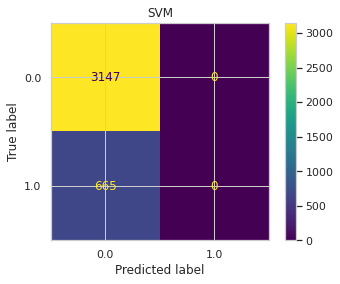

In [103]:
plot_confusion_matrix(svm_model, X_test, y_test, values_format='d')
plt.title('SVM')
plt.show()

Regressão logística e SVM apresentam valores nulos no canto esquerdo do quadrado, portanto não utilizarei esses dois modelos. Para escolher o modelo a ser utilizado, farei mais uma etapa.

**ROC**

A curva ROC mostra o quão bom o modelo criado pode distinguir entre duas classes. 

In [104]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay, roc_auc_score
y_test_int = (y_test.to_numpy() == 0.0).astype(int)
y_test_int

array([1, 1, 1, ..., 1, 1, 1])

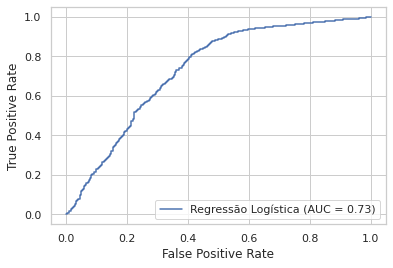

Logistic Regression: 0.7308093876254028


In [105]:
fpr, tpr, thresholds = roc_curve(y_test_int, lgreg.predict_proba(X_test)[:,0])
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Regressão Logística')
display.plot()
plt.show()
print(f'Logistic Regression: {roc_auc_score(y_test_int, lgreg.predict_proba(X_test)[:,0])}')

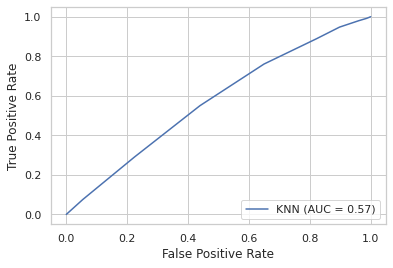

KNN: 0.5727089410848379


In [106]:
fpr, tpr, thresholds = roc_curve(y_test_int, knn_model.predict_proba(X_test)[:,0])
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='KNN')
display.plot()
plt.show()
print(f'KNN: {roc_auc_score(y_test_int, knn_model.predict_proba(X_test)[:,0])}')

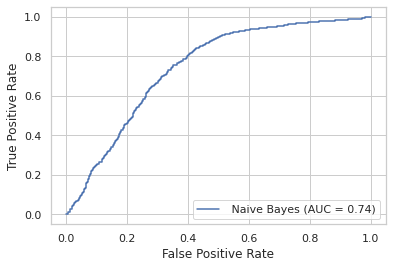

Naive Bayes: 0.7426574061464433


In [111]:
fpr, tpr, thresholds = roc_curve(y_test_int, nb_model.predict_proba(X_test)[:,0])
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=' Naive Bayes')
display.plot()
plt.show()
print(f'Naive Bayes: {roc_auc_score(y_test_int, nb_model.predict_proba(X_test)[:,0])}')

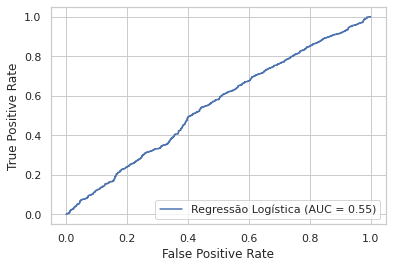

Logistic Regression: 0.5479370494873982


In [113]:
fpr, tpr, thresholds = roc_curve(y_test_int, svm_model.predict_proba(X_test)[:,0])
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Regressão Logística')
display.plot()
plt.show()
print(f'Logistic Regression: {roc_auc_score(y_test_int, svm_model.predict_proba(X_test)[:,0])}')

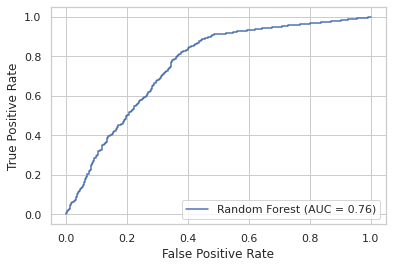

Random Forest: 0.7563613514243187


In [112]:
fpr, tpr, thresholds = roc_curve(y_test_int, rf.predict_proba(X_test)[:,0])
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest')
display.plot()
plt.show()
print(f'Random Forest: {roc_auc_score(y_test_int, rf.predict_proba(X_test)[:,0])}')

Além da acurácia, há outras méticas como a de **Recall** (definida pela razão entre a quantidade de exemplos classificados corretamente como positivos e a quantidade de exemplos que são de fato positivos), **Precisão** (definida pela razão entre a quantidade de exemplos classificados corretamente como positivos e o total de exemplos classificados como positivos) e **F1**(definida como a média harmômica entre a precisão e a revocação).

In [114]:
print('Logistic Regression')
print(classification_report(y_test, y_test_predict, zero_division=0))
print('Random Forest')
print(classification_report(y_test, predicted, zero_division=0))
print('kNN')
print(classification_report(y_test, y_predicted_knn, zero_division=0))
print('Naive Bayes')
print(classification_report(y_test, y_predicted_bayes, zero_division=0))
print('SVM')
print(classification_report(y_test, y_predicted_svm, zero_division=0))

Logistic Regression
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      3147
         1.0       0.57      0.37      0.45       665

    accuracy                           0.84      3812
   macro avg       0.72      0.65      0.68      3812
weighted avg       0.82      0.84      0.83      3812

Random Forest
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90      3147
         1.0       0.55      0.46      0.50       665

    accuracy                           0.84      3812
   macro avg       0.72      0.69      0.70      3812
weighted avg       0.83      0.84      0.83      3812

kNN
              precision    recall  f1-score   support

         0.0       0.83      0.99      0.90      3147
         1.0       0.26      0.01      0.03       665

    accuracy                           0.82      3812
   macro avg       0.54      0.50      0.46      3812
weighted avg       0.73      0.82   

Entre todas as métricas usadas, a que aparenta ser a melhor para a predição final é a **Random Forest**, portanto, ela será a utilizada.

###Predição

Para a predição, usaremos o dataset de teste, que precisará transformar os dados categóricos em numéricos. Além disso, ele será unido ao dataset de treino porque há uma coluna a menos, no dataset de teste, para realizar esse procedimento. 

In [118]:
data = pd.concat([train, test])
one_hot_encoding_final = pd.get_dummies(data)
one_hot_encoding_final

,enrollee_id,city_development_index,training_hours,target,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,city_city_106,city_city_107,city_city_109,city_city_11,city_city_111,city_city_114,city_city_115,city_city_116,city_city_117,city_city_118,city_city_12,city_city_120,city_city_121,city_city_123,city_city_126,city_city_127,city_city_128,city_city_129,city_city_13,city_city_131,city_city_133,city_city_134,city_city_136,city_city_138,city_city_139,city_city_14,city_city_141,city_city_142,...,experience_11,experience_12,experience_13,experience_14,experience_15,experience_16,experience_17,experience_18,experience_19,experience_2,experience_20,experience_3,experience_4,experience_5,experience_6,experience_7,experience_8,experience_9,experience_<1,experience_>20,company_size_10-49,company_size_100-500,company_size_1000-4999,company_size_10000>,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
1,29725,0.776,47,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,666,0.767,8,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
6,28806,0.920,24,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
7,402,0.762,18,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
8,27107,0.920,46,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,0.920,15,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2125,195,0.897,30,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2126,31762,0.887,18,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2127,7873,0.804,84,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


Dividirei em treino e teste.

In [116]:
train.shape #tamanho do dataset de treino

(12704, 14)

In [119]:
X_final = one_hot_encoding_final.drop('target', axis = 1)
y_final = one_hot_encoding_final['target']
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_final, y_final, train_size=12704, shuffle = False)

In [120]:
rf = RandomForestClassifier(
    max_depth=25,
    n_estimators=200,
    min_samples_split=50,
    criterion='entropy',
    oob_score=True,
    random_state=42
)
rf.fit(X_train_f.values, y_train_f.values)

RandomForestClassifier(criterion='entropy', max_depth=25, min_samples_split=50,
                       n_estimators=200, oob_score=True, random_state=42)

In [127]:
y_predicted_final = rf.predict(X_test_f.values)
test['target'] = y_predicted_final # adicionei no dataset de teste para visualizar 

##CONCLUSÃO

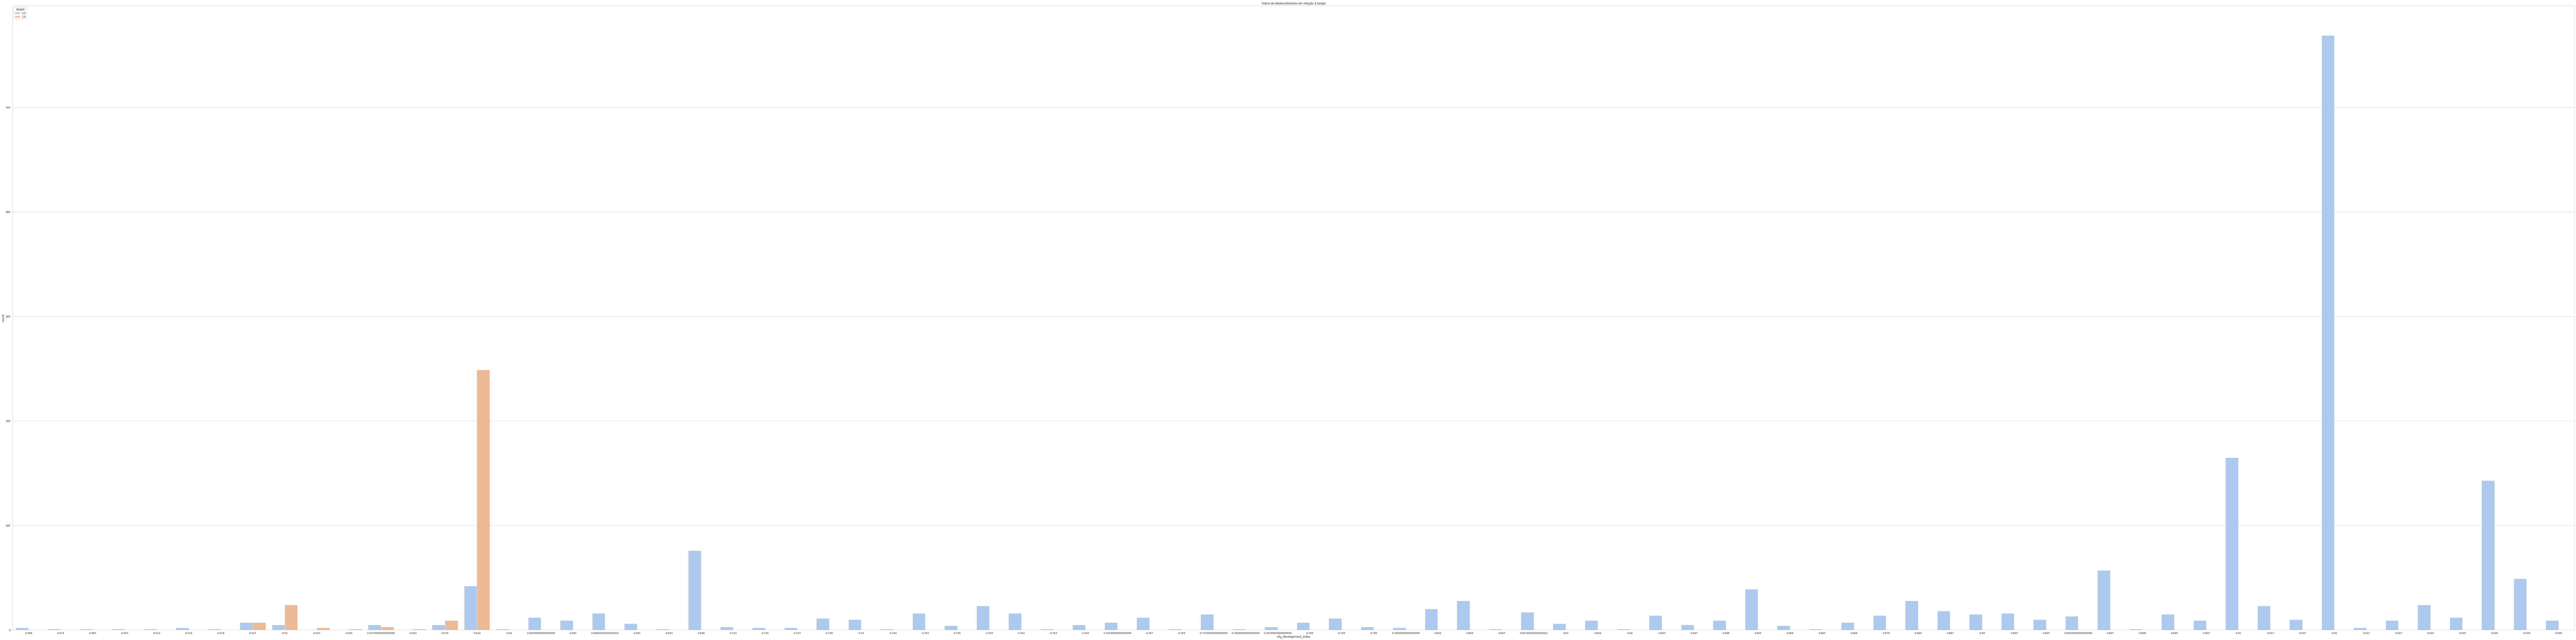

In [143]:
plt.figure(figsize=(200,50))
plt.title("Índice de desenvolimento em relação à target")
sns.countplot(x='city_development_index', hue = 'target' , data = test, palette='pastel') 
plt.show()

In [126]:
test['target'].value_counts()

0.0    1722
1.0     296
Name: target, dtype: int64

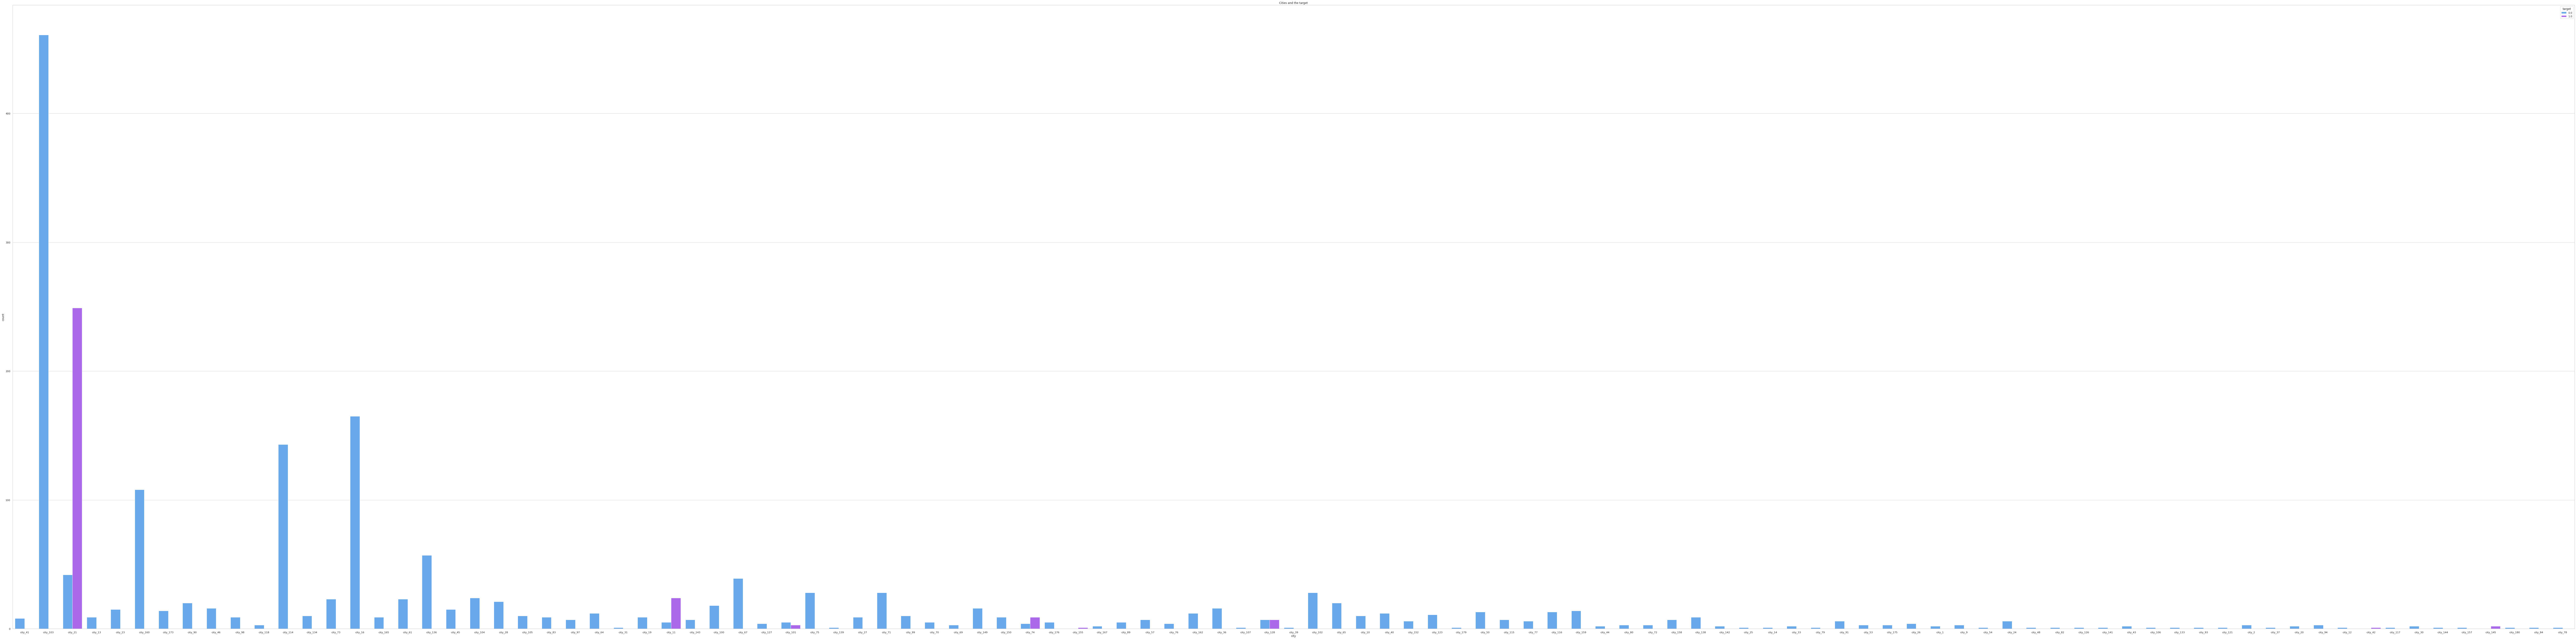

In [144]:
plt.figure(figsize=(200,50))
sns.countplot(x='city', hue = 'target', data=test, palette = "cool")
plt.title("Cities and the target")
plt.show()

Como o dataset de treino já demonstrava, a grande maioria das pessoas não pretendem mudar de emprego na maioria das cidades, com algumas exceções, principalmente em cidades com baixo índice de desenvolvimento.

Com isso, encerro aqui a análise e predição do case proposto :)